#Projekt PAD Mateusz Augustyniak s18531

1 PRZYGOTOWANIE DANYCH

1.1 Wczytuję dane do DataFrame

In [1]:
#importy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.formula.api as smf
import plotly.graph_objects as go
from scipy import stats
from dash import Dash, html, dcc
from dash.dependencies import Input, Output

In [2]:
data = pd.read_csv("messy_data.csv")
data

,carat,clarity,color,cut,x dimension,y dimension,z dimension,depth,table,price
0,0.50,IF,D,Ideal,5.1,5.15,3.2,61.5,,3000
1,0.70,vvs2,E,premium,5.7,,3.52,62,59,4500
2,NaN,Si2,h,Good,4.3,4.31,,62.3,56,700
3,1.20,if,d,ideal,,6.82,4.2,61.7,58,10000
4,0.90,I1,J,Fair,6,,3.7,61.7,,2400
...,...,...,...,...,...,...,...,...,...,...
195,0.45,si1,F,very good,4.9,4.89,,62.4,59,2300
196,1.25,VVS2,H,Good,6.9,,4.27,,55,10400
197,0.55,i1,I,Premium,5.3,,3.28,62.3,57,150000
198,0.85,Si2,E,fair,6.1,6.13,3.78,,58,6300


1.2 Poszukuje wartosci NaN, bledow oraz czyszcze dane z wartosci null poprzez podstawienie srednich

Szukam unikalnych wartosci, bledy z reguly sa unikalne

In [3]:
data.melt()

,variable,value
0,carat,0.5
1,carat,0.7
2,carat,NaN
3,carat,1.2
4,carat,0.9
...,...,...
1995,price,2300
1996,price,10400
1997,price,150000
1998,price,6300


Pojawily sie wartosci NaN, to oznacza, ze kolumny zawieraja brakujace dane.
Sprawdzam, ktore kolumny zawieraja nulle

In [4]:
data.isnull().sum()

carat           50
 clarity         0
 color           0
 cut             0
 x dimension     0
 y dimension     0
 z dimension     0
 depth           0
 table           0
 price           0
dtype: int64

Karat zawiera 50 nulli
Sprawdzam wartosci nan

In [5]:
data.isna().sum()

carat           50
 clarity         0
 color           0
 cut             0
 x dimension     0
 y dimension     0
 z dimension     0
 depth           0
 table           0
 price           0
dtype: int64

Okej. Czyli wartosci null sa tylko w carat.
Zamienmy wartosci null oraz nan na usrednione wartosci w kolumnie carat

In [6]:
mean = data['carat'].mean()
data['carat'].fillna(value=mean, inplace=True)

Sprawdzam na nowo wartosci null

In [7]:
data.isnull().sum()
data.isna().sum()



carat           0
 clarity        0
 color          0
 cut            0
 x dimension    0
 y dimension    0
 z dimension    0
 depth          0
 table          0
 price          0
dtype: int64

Teraz nie ma nulli. W datasecie widac tez wartosci puste, sprawdzmy je na przykladzie x dimension

In [8]:
data[data[' x dimension'] == ' ']

,carat,clarity,color,cut,x dimension,y dimension,z dimension,depth,table,price
3,1.2,if,d,ideal,,6.82,4.2,61.7,58,10000
10,0.5,Si1,Colorless,premium,,5.21,3.21,61.6,58,
19,0.7,i1,J,fair,,5.79,3.57,61.6,,2100


W tym przypadku niestety nie moge pokusic sie o usuniecie danych z uwagi na bardzo maly dataset. Usuniecie tak duzej ilosci danych spowoduje znaczny impact na wyniki eksperymentu.
Zdecydowalem sie na wykorzystanie funkcji interpolate z biblioteki pandas. Uzyjemy ML do uzupelnienia tych brakujacych danych.

In [9]:
data[' x dimension'] = pd.to_numeric(data[' x dimension'], errors='coerce')
data[' x dimension'].fillna(data[' x dimension'].interpolate(method='linear'), inplace=True)


Analogiczna sytuacje wykonuje dla pozostalych wymiarow Y oraz Z

In [10]:
data[' y dimension'] = pd.to_numeric(data[' y dimension'], errors='coerce')
data[' z dimension'] = pd.to_numeric(data[' z dimension'], errors='coerce')
data[' y dimension'].fillna(data[' y dimension'].interpolate(method='linear'), inplace=True)
data[' z dimension'].fillna(data[' z dimension'].interpolate(method='linear'), inplace=True)

Kolejnym krokiem jest uzupelnienie wartosci null poprzez srednie w pozostalych kolumnach

In [11]:
data[data[' clarity'] == ' '] #brak nulli
data[data['carat'] == ' '] #brak nulli
data[data[' color'] == ' '] #brak nulli
data[data[' cut'] == ' '] #brak nulli
data[data[' depth'] == ' '] # SA NULLE!!!!!!11
data[data[' table'] == ' '] # SA NULLE!!!!!!
data[data[' price'] == ' '] # SA NULLE UWAGA JEST TO ZMIENNA DETERMINUJACA, NALEZY TEN WIERSZ USUNAC PONIWAZ NIE MA WARTOSCI PRAWIDLOWEJ
data

,carat,clarity,color,cut,x dimension,y dimension,z dimension,depth,table,price
0,0.500,IF,D,Ideal,5.10,5.150000,3.200,61.5,,3000
1,0.700,vvs2,E,premium,5.70,4.730000,3.520,62,59,4500
2,0.799,Si2,h,Good,4.30,4.310000,3.860,62.3,56,700
3,1.200,if,d,ideal,5.15,6.820000,4.200,61.7,58,10000
4,0.900,I1,J,Fair,6.00,6.370000,3.700,61.7,,2400
...,...,...,...,...,...,...,...,...,...,...
195,0.450,si1,F,very good,4.90,4.890000,4.115,62.4,59,2300
196,1.250,VVS2,H,Good,6.90,5.303333,4.270,,55,10400
197,0.550,i1,I,Premium,5.30,5.716667,3.280,62.3,57,150000
198,0.850,Si2,E,fair,6.10,6.130000,3.780,,58,6300


A wiec zastepuje nulle wartoscia srednia w kolumnach depth oraz table. Zeby to zrobic nalezy przekonwertowac dane na numeryczne. Co i tak bedzie konieczne do modelu regresji.

In [12]:
data[' table'] = pd.to_numeric(data[' table'], errors='coerce')
mean = data[' table'].mean()
data[' table'].fillna(mean, inplace=True)

Tak jak pisalem wczesniej, w tym zadaniu trzeba stworzyc model regresji. Model regresji jest modelem uczenia maszynowego z nadzorem, wiec oczekuje przy danych poprawnego wyniku jakim jest wartosc kolumny price.
Dla poprawnego dzialania algorytmu nalezy usunac ta wartosc, uwazam, ze przewidywanie zmiennej determinujacej moze zaburzyc algorytm.

In [13]:
id = data[data[' price'] == ' '].index
data.drop(index=id, inplace=True)

Zaktualizujmy indexy, troche namieszalismy. Nalezy usunac nadmiarowa kolumne index

In [14]:
data.reset_index(inplace=True)
data.drop(columns='index', inplace=True)

1.3 SPOJNOSC DANYCH

Pozwolilem sobie wyszukac dane w internecie, znalazlem informacje, ze kolumna depth jest liczona dynamicznie. Wyliczmy brakujace wartosci depth na podstawie x,y,z dimension

In [15]:
data[' depth'] = pd.to_numeric(data[' depth'], errors='coerce')
data[' depth'].fillna(2 * data[' z dimension'] / (data[' x dimension'] + data[' y dimension']), inplace=True)

Zerknijmy czy nie ma bledow w nomenklaturze

In [16]:
data.value_counts()

carat   clarity   color   cut         x dimension   y dimension   z dimension   depth      table     price
0.200   Si1       H       very Good  3.9           3.89          2.41          62.100000  56.91018   500      1
0.799   vvs1      E       Premium    6.3           5.48          3.90          62.300000  59.00000   7800     1
        vvs2      D       fair       6.4           6.25          3.97          62.400000  56.91018   7900     1
                          good       6.4           6.42          3.97          0.619345   56.91018   8000     1
                                     6.8           6.81          4.21          0.618663   59.00000   8100     1
                                                                                                             ..
0.700   Si2       d       good       5.7           5.69          3.53          62.500000  56.91018   4000     1
        VVS1      I       Fair       5.8           5.77          3.59          0.620570   55.00000   4300    

Sa bledy w nazewnictwie. Zrobmy wszystkie kategoryczne zmienne upper casem. Przyda sie to do szukania duplikatow

In [17]:
data[' clarity'] = data[' clarity'].astype("string")
data[' color'] = data[' color'].astype("string")
data[' cut'] = data[' cut'].astype("string")

data[' clarity'] = data[' clarity'].str.upper()
data[' color'] = data[' color'].str.upper()
data[' cut'] = data[' cut'].str.upper()
data[' clarity'] = data[' clarity'].str.strip()

Szukamy duplikatow

In [18]:
data.duplicated().value_counts()

False    196
Name: count, dtype: int64

Jak widac nie ma duplikatow. Poszukajmy zatem wartosci odstajacych.

W celu weryfikacji wartosci odstajacych, konieczna jest zamiana wartosci kategorycznych na numeryczne.
Pozwole sobie zrobic to recznie, zeby zachowac kontrole nad danymi.

In [19]:
data[' clarity'].replace('I1', '1', inplace=True)
data[' clarity'].replace('SI2', '2', inplace=True)
data[' clarity'].replace('SI1', '3', inplace=True)
data[' clarity'].replace('VS2', '4', inplace=True)
data[' clarity'].replace('VS1', '5', inplace=True)
data[' clarity'].replace('VVS2', '6', inplace=True)
data[' clarity'].replace('VVS1', '7', inplace=True)
data[' clarity'].replace('IF', '8', inplace=True)
data[' clarity'] = data[' clarity'].astype(int)


In [20]:
data[' color'].replace(' G', '1', inplace=True)
data[' color'].replace(' H', '2', inplace=True)
data[' color'].replace(' I', '3', inplace=True)
data[' color'].replace(' F', '4', inplace=True)
data[' color'].replace(' E', '5', inplace=True)
data[' color'].replace(' D', '6', inplace=True)
data[' color'].replace(' J', '7', inplace=True)
data[' color'].replace(' COLORLESS', '0', inplace=True)
data[' color'] = data[' color'].astype(int)

In [21]:
data[' cut'].replace(' GOOD', '1', inplace=True)
data[' cut'].replace(' PREMIUM', '2', inplace=True)
data[' cut'].replace(' VERY GOOD', '3', inplace=True)
data[' cut'].replace(' FAIR', '4', inplace=True)
data[' cut'].replace(' IDEAL', '5', inplace=True)
data[' cut'] = data[' cut'].astype(int)
data[' cut'].value_counts()

 cut
1    49
2    40
3    40
4    36
5    31
Name: count, dtype: int64

Teraz usunmy spacje z nazw kolumn

In [22]:
data.columns = data.columns.str.strip()

Teraz poszukajmy wartosci odstajacych poprzez wizualizacje

{'whiskers': [<matplotlib.lines.Line2D at 0x15ca258d0>,
 'caps': [<matplotlib.lines.Line2D at 0x15ca270d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x15c834390>],
 'medians': [<matplotlib.lines.Line2D at 0x15ca30710>],
 'fliers': [<matplotlib.lines.Line2D at 0x15ca31110>],
 'means': []}

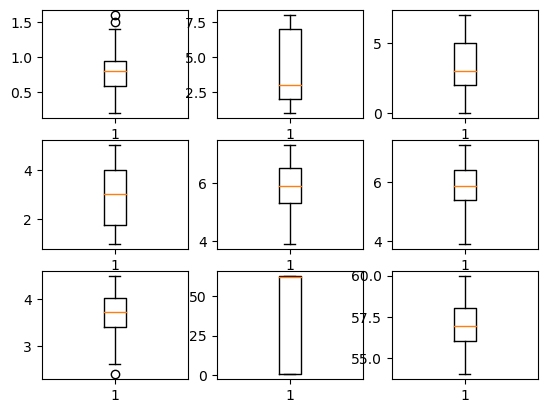

In [23]:
fig, axs = plt.subplots(3,3)
axs[0,0].boxplot(data['carat'])
axs[0,1].boxplot(data['clarity'])
axs[0,2].boxplot(data['color'])
axs[1,0].boxplot(data['cut'])
axs[1,1].boxplot(data['x dimension'])
axs[1,2].boxplot(data['y dimension'])
axs[2,0].boxplot(data['z dimension'])
axs[2,1].boxplot(data['depth'])
axs[2,2].boxplot(data['table'])

Widac wartosci odstajace w dwoch zmiennych CARAT oraz z dimension. Zweryfikujmy je

{'whiskers': [<matplotlib.lines.Line2D at 0x15c9c6b10>,
 'caps': [<matplotlib.lines.Line2D at 0x15cb11bd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x15cb10210>],
 'medians': [<matplotlib.lines.Line2D at 0x15cb12c50>],
 'fliers': [<matplotlib.lines.Line2D at 0x15cb04d50>],
 'means': []}

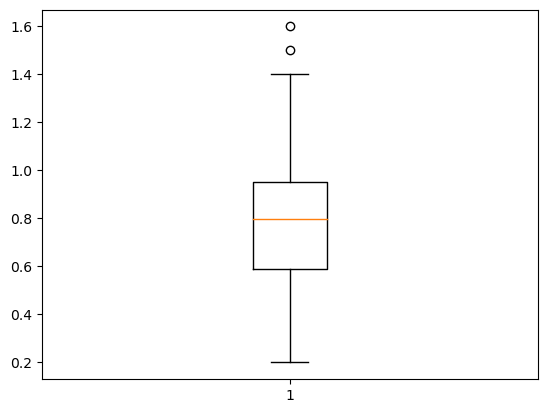

In [24]:
plt.boxplot(data['carat'])

Widac wartosci powyzej 1.4. Proponuje je usunac

In [25]:
data[data['carat'] > 1.4]
data.drop(20, inplace=True)
data.drop(27, inplace = True)
data.reset_index

<bound method DataFrame.reset_index of      carat  clarity  color  cut  x dimension  y dimension  z dimension  \
0    0.500        8      6    5         5.10     5.150000        3.200   
1    0.700        6      5    2         5.70     4.730000        3.520   
2    0.799        2      2    1         4.30     4.310000        3.860   
3    1.200        8      6    5         5.15     6.820000        4.200   
4    0.900        1      7    4         6.00     6.370000        3.700   
..     ...      ...    ...  ...          ...          ...          ...   
191  0.450        3      4    3         4.90     4.890000        4.115   
192  1.250        6      2    1         6.90     5.303333        4.270   
193  0.550        1      3    2         5.30     5.716667        3.280   
194  0.850        2      5    4         6.10     6.130000        3.780   
195  0.799        7      1    3         6.40     6.430000        3.970   

         depth     table    price  
0    61.500000  56.91018     3000  


Sprawdzmy ponownie

{'whiskers': [<matplotlib.lines.Line2D at 0x15cb79650>,
 'caps': [<matplotlib.lines.Line2D at 0x15cb7a7d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x15cb78cd0>],
 'medians': [<matplotlib.lines.Line2D at 0x15cb7b990>],
 'fliers': [<matplotlib.lines.Line2D at 0x15cb7b910>],
 'means': []}

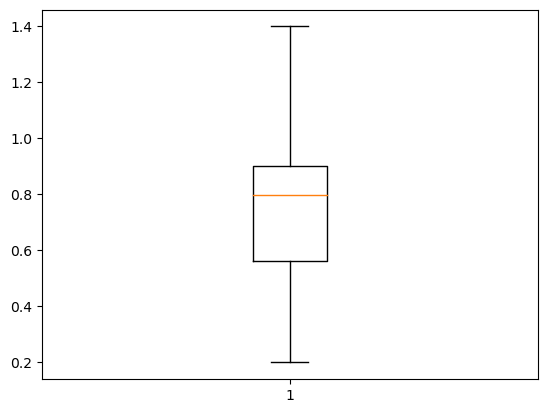

In [26]:
plt.boxplot(data['carat'])

Sprawdzmy teraz z dimension

{'whiskers': [<matplotlib.lines.Line2D at 0x15cbec7d0>,
 'caps': [<matplotlib.lines.Line2D at 0x15cbed5d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x15cbe3ad0>],
 'medians': [<matplotlib.lines.Line2D at 0x15cbeebd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x15ca77650>],
 'means': []}

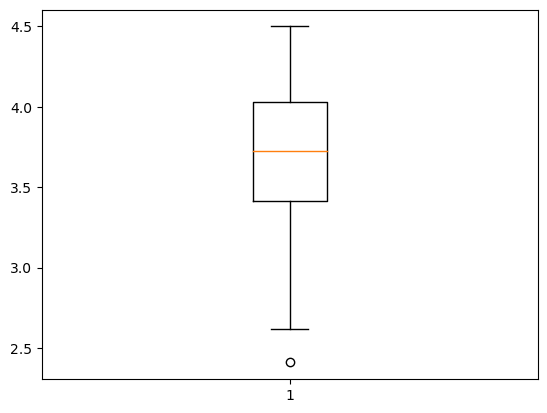

In [27]:
plt.boxplot(data['z dimension'])

Mamy wartosci ponizej 2.6 Usunmy je

In [28]:
data[data['z dimension'] < 2.6]
data.drop(21, inplace=True)
data.reset_index

<bound method DataFrame.reset_index of      carat  clarity  color  cut  x dimension  y dimension  z dimension  \
0    0.500        8      6    5         5.10     5.150000        3.200   
1    0.700        6      5    2         5.70     4.730000        3.520   
2    0.799        2      2    1         4.30     4.310000        3.860   
3    1.200        8      6    5         5.15     6.820000        4.200   
4    0.900        1      7    4         6.00     6.370000        3.700   
..     ...      ...    ...  ...          ...          ...          ...   
191  0.450        3      4    3         4.90     4.890000        4.115   
192  1.250        6      2    1         6.90     5.303333        4.270   
193  0.550        1      3    2         5.30     5.716667        3.280   
194  0.850        2      5    4         6.10     6.130000        3.780   
195  0.799        7      1    3         6.40     6.430000        3.970   

         depth     table    price  
0    61.500000  56.91018     3000  


Sprawdzmy

{'whiskers': [<matplotlib.lines.Line2D at 0x15cc13350>,
 'caps': [<matplotlib.lines.Line2D at 0x15cc46410>,
 'boxes': [<matplotlib.lines.Line2D at 0x15cc44490>],
 'medians': [<matplotlib.lines.Line2D at 0x15cc47b90>],
 'fliers': [<matplotlib.lines.Line2D at 0x15cc3ba10>],
 'means': []}

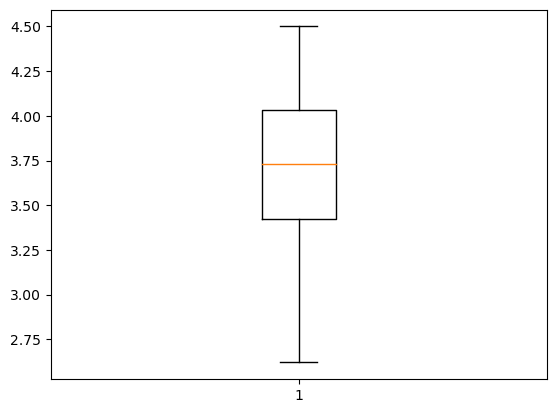

In [29]:
plt.boxplot(data['z dimension'])

Sprawdzmy jeszcze price

{'whiskers': [<matplotlib.lines.Line2D at 0x15ccb8a50>,
 'caps': [<matplotlib.lines.Line2D at 0x15ccba1d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x15cca7e90>],
 'medians': [<matplotlib.lines.Line2D at 0x15ccbb850>],
 'fliers': [<matplotlib.lines.Line2D at 0x15cc10b90>],
 'means': []}

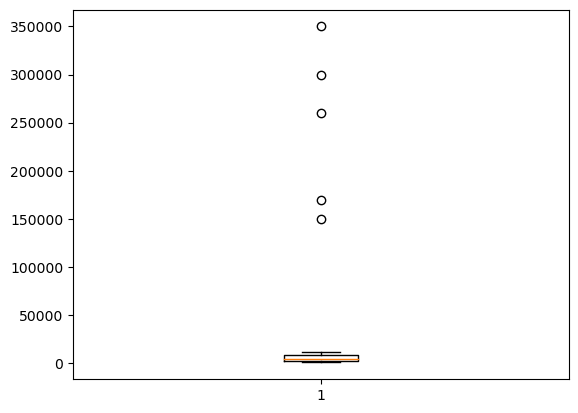

In [30]:
data['price'] = data['price'].astype(int)
plt.boxplot(data['price'])

Mamy bardzo duzy rozrzut powyzej 130000. Usunmy to bo popsuje model

In [31]:
data[data['price'] > 130000]
data.drop(178, inplace=True)
data.drop(180, inplace=True)
data.drop(183, inplace=True)
data.drop(185, inplace=True)
data.drop(193, inplace=True)
data.reset_index

<bound method DataFrame.reset_index of      carat  clarity  color  cut  x dimension  y dimension  z dimension  \
0    0.500        8      6    5         5.10     5.150000        3.200   
1    0.700        6      5    2         5.70     4.730000        3.520   
2    0.799        2      2    1         4.30     4.310000        3.860   
3    1.200        8      6    5         5.15     6.820000        4.200   
4    0.900        1      7    4         6.00     6.370000        3.700   
..     ...      ...    ...  ...          ...          ...          ...   
190  0.950        3      1    5         6.40     6.420000        3.960   
191  0.450        3      4    3         4.90     4.890000        4.115   
192  1.250        6      2    1         6.90     5.303333        4.270   
194  0.850        2      5    4         6.10     6.130000        3.780   
195  0.799        7      1    3         6.40     6.430000        3.970   

         depth     table  price  
0    61.500000  56.91018   3000  
1   

Sprawdzmy

{'whiskers': [<matplotlib.lines.Line2D at 0x15cd21010>,
 'caps': [<matplotlib.lines.Line2D at 0x15cd225d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x15c675490>],
 'medians': [<matplotlib.lines.Line2D at 0x15cd23bd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x15caac6d0>],
 'means': []}

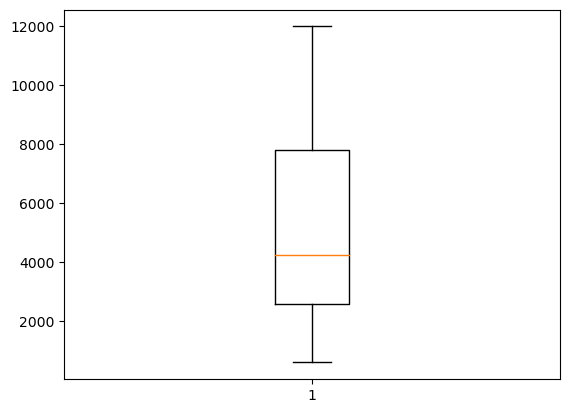

In [32]:
plt.boxplot(data['price'])

Kolejny krok to wizualizacja statystyk.

Wizualizacja rozkladu zmiennych losowych

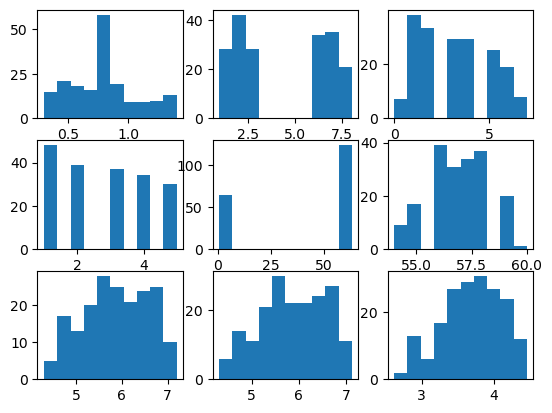

In [33]:
fig, axs = plt.subplots(3,3)
axs[0,0].hist(data['carat'])
axs[0,1].hist(data['clarity'])
axs[0,2].hist(data['color'])
axs[1,0].hist(data['cut'])
axs[1,1].hist(data['depth'])
axs[1,2].hist(data['table'])
axs[2,0].hist(data['x dimension'])
axs[2,1].hist(data['y dimension'])
axs[2,2].hist(data['z dimension'])

plt.show()

Wizualizacja liczebnosci kategorii

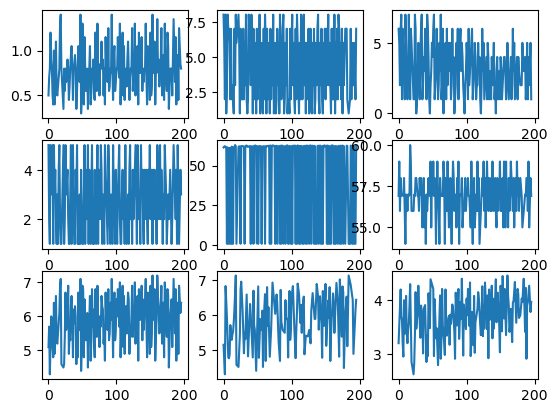

In [34]:
fig, axs = plt.subplots(3,3)
axs[0,0].plot(data['carat'])
axs[0,1].plot(data['clarity'])
axs[0,2].plot(data['color'])
axs[1,0].plot(data['cut'])
axs[1,1].plot(data['depth'])
axs[1,2].plot(data['table'])
axs[2,0].plot(data['x dimension'])
axs[2,1].plot(data['y dimension'])
axs[2,2].plot(data['z dimension'])
plt.show()

Heatmap korelacji

<Axes: >

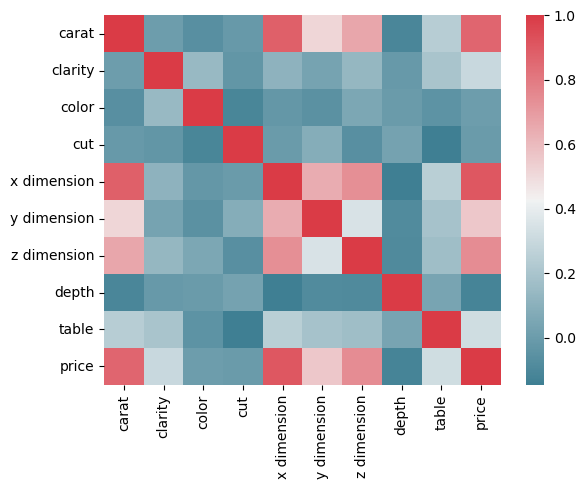

In [35]:
sns.heatmap(data.corr(), cmap=sns.diverging_palette(220, 10, as_cmap=True))


Jak widac nie ma silnych koleracji pomiedzy zmiennymi. To bardzo dobry znak przy budowaniu modelu regresji liniowej

3. BUDOWANIE MODELU REGRESJI LINIOWEJ

Lekkie poprawki w danych

In [36]:
data.columns = data.columns.str.replace(' ', '')
data['price'] = data['price'].astype(float)

In [37]:
model = smf.ols("price ~ carat + clarity + color + cut + xdimension + ydimension + zdimension + depth + table", data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     194.2
Date:                Sun, 28 Jan 2024   Prob (F-statistic):           3.99e-87
Time:                        23:28:25   Log-Likelihood:                -1553.6
No. Observations:                 188   AIC:                             3127.
Df Residuals:                     178   BIC:                             3160.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.308e+04   3398.515     -6.790      0.000   -2.98e+04   -1.64e+04
carat       4244.3017    584.617      7.260      0.000    3090.630    5397.974
clarity      263.6472     29.408      8.965      0.000     205.614     321.680
color          7.9993     38.320      0.209      0.835     -67.621      83.620
cut           58.9431     51.150      1.152      0.251     -41.995     159.881
xdimension  1807.3442    268.214      6.738      0.000    1278.056    2336.633
ydimension   118.5548    141.686      0.837      0.404    -161.046     398.156
zdimension  1040.5814    262.017      3.971      0.000     523.522    1557.641
depth         -0.3904      2.447     -0.160      0.873      -5.218       4.438
table        149.3248     58.745      2.542      0.012      33.398     265.251
==============================================================================
Omnibus:                        7.170   Durbin-Watson:                   2.226
Prob(Omnibus):                  0.028   Jarque-Bera (JB):                6.891
Skew:                          -0.421   Prob(JB):                       0.0319
Kurtosis:                       3.413   Cond. No.                     3.55e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.55e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Wykonajmy selekcje postepujaca

In [38]:
data.corr()

,carat,clarity,color,cut,xdimension,ydimension,zdimension,depth,table,price
carat,1.000000,0.004717,-0.062161,-0.016167,0.882676,0.515127,0.663244,-0.109495,0.242440,0.864708
clarity,0.004717,1.000000,0.143887,-0.032095,0.110577,0.036801,0.131617,-0.014593,0.197163,0.297317
color,-0.062161,0.143887,1.000000,-0.111131,-0.025532,-0.055828,0.052931,-0.007672,-0.043833,0.002584
cut,-0.016167,-0.032095,-0.111131,1.000000,-0.006624,0.083062,-0.063834,0.030835,-0.143638,-0.004996
xdimension,0.882676,0.110577,-0.025532,-0.006624,1.000000,0.642133,0.733899,-0.146525,0.249410,0.908941
ydimension,0.515127,0.036801,-0.055828,0.083062,0.642133,1.000000,0.349152,-0.087557,0.185088,0.559407
zdimension,0.663244,0.131617,0.052931,-0.063834,0.733899,0.349152,1.000000,-0.090395,0.162855,0.741773
depth,-0.109495,-0.014593,-0.007672,0.030835,-0.146525,-0.087557,-0.090395,1.000000,0.038956,-0.121192
table,0.242440,0.197163,-0.043833,-0.143638,0.249410,0.185088,0.162855,0.038956,1.000000,0.323578
price,0.864708,0.297317,0.002584,-0.004996,0.908941,0.559407,0.741773,-0.121192,0.323578,1.000000


Najwieksza korelacje ze zmienna zalezna maja, kolejnosc od najwiekszej do najmniejszej:
xdimension
table
carat
zdimension
ydimension
cut
color
clarity

Dodajmy zmienne w tej kolejnosci i obserwujmy model

In [39]:
model = smf.ols("price ~ xdimension", data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     884.0
Date:                Sun, 28 Jan 2024   Prob (F-statistic):           1.38e-72
Time:                        23:28:57   Log-Likelihood:                -1613.0
No. Observations:                 188   AIC:                             3230.
Df Residuals:                     186   BIC:                             3236.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.733e+04    766.144    -22.620      0.000   -1.88e+04   -1.58e+04
xdimension  3842.4046    129.232     29.733      0.000    3587.456    4097.353
==============================================================================
Omnibus:                       36.810   Durbin-Watson:                   2.131
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              269.457
Skew:                           0.395   Prob(JB):                     3.08e-59
Kurtosis:                       8.812   Cond. No.                         49.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Sprawdzmy korelacje czastkowe

In [40]:
model1 = smf.ols("price ~ depth", data).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     2.773
Date:                Sun, 28 Jan 2024   Prob (F-statistic):             0.0976
Time:                        23:28:59   Log-Likelihood:                -1776.1
No. Observations:                 188   AIC:                             3556.
Df Residuals:                     186   BIC:                             3563.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5804.6568    389.269     14.912      0.000    5036.708    6572.606
depth        -12.8034      7.689     -1.665      0.098     -27.973       2.366
==============================================================================
Omnibus:                       59.439   Durbin-Watson:                   2.338
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.086
Skew:                           0.453   Prob(JB):                     0.000321
Kurtosis:                       1.889   Cond. No.                         87.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

table = 0.021
carat = 0.023
zdimension = 0.022
ydimension = 0.014
cut = 0.004
color = 0.003
clarity = 0.000
depth = 0

Chyba widac, ktore zmienne powinny zostac dodane do modelu i w jakiej kolejnosci



In [41]:
model = smf.ols("price ~ xdimension + carat + zdimension + table + ydimension + cut + color", data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     165.9
Date:                Sun, 28 Jan 2024   Prob (F-statistic):           5.23e-75
Time:                        23:29:01   Log-Likelihood:                -1588.6
No. Observations:                 188   AIC:                             3193.
Df Residuals:                     180   BIC:                             3219.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.971e+04   3973.096     -7.478      0.000   -3.75e+04   -2.19e+04
xdimension  2211.9279    315.104      7.020      0.000    1590.155    2833.701
carat       3128.7291    684.039      4.574      0.000    1778.962    4478.496
zdimension  1193.1156    313.101      3.811      0.000     575.295    1810.936
table        254.6416     68.702      3.706      0.000     119.076     390.207
ydimension    38.7652    169.419      0.229      0.819    -295.538     373.068
cut           68.0478     61.216      1.112      0.268     -52.746     188.842
color         53.9444     45.503      1.186      0.237     -35.843     143.732
==============================================================================
Omnibus:                       17.955   Durbin-Watson:                   2.347
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.159
Skew:                          -0.571   Prob(JB):                     2.09e-06
Kurtosis:                       4.427   Cond. No.                     2.72e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.72e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Reszte zmiennych usunmy

In [42]:
data.drop(columns="clarity", inplace=True)
data.drop(columns="depth", inplace=True)

Stworzmy modele wymagane do prezentacji

In [43]:
modelCarat = smf.ols("price ~ carat", data).fit()
modelColor = smf.ols("price ~ color", data).fit()
modelCut = smf.ols("price ~ cut", data).fit()
modelXdimension = smf.ols("price ~ xdimension", data).fit()
modelYdimension = smf.ols("price ~ ydimension", data).fit()
modelZdimension = smf.ols("price ~ zdimension", data).fit()
modelTable = smf.ols("price ~ table", data).fit()

Wizualizacja wynikow regresji

Stworzenie wizualizacji w Dash

In [46]:
app = Dash(__name__)
#111111y
#7FDBFF

app.layout = html.Div(style={'backgroundColor' : '#FFFFFF'},
                      
                      children=[
                          html.H1(
                              children="Tablica dash",
                              style={
                                  'textAlign': 'center',
                                  'color' : '#7FDBFF'
                              }
                          ),

                        html.Label('Select variable to show'),
                        dcc.Dropdown(id='drop', options=data.columns, value='carat'),
                        dcc.Graph(id='wykres')
])

@app.callback(
    Output('wykres', 'figure'),
    Input('drop', 'value')
)
def updateFigure(selectedVariable):
    model = smf.ols(F"price ~ {selectedVariable}", data).fit()
    modelFit = model.fittedvalues
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=data[selectedVariable], y=data['price'], name=F"Price vs {selectedVariable}", mode="markers"))
    fig.add_trace(go.Scatter(x=data[selectedVariable], y=modelFit, name="Fitted regression line"))
    fig.update_layout(title=F"Regression line price vs {selectedVariable}", xaxis_title= selectedVariable, yaxis_title="Price")
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)